# Densenet
Desenet is a convolutional network where each layer is connected to all toher layers that are deeper in the network.

- The first layer is connected to the 3rd, 4th etc.
- The second layer is connected to the 3rd, 4th, 5th etc.
Like this:


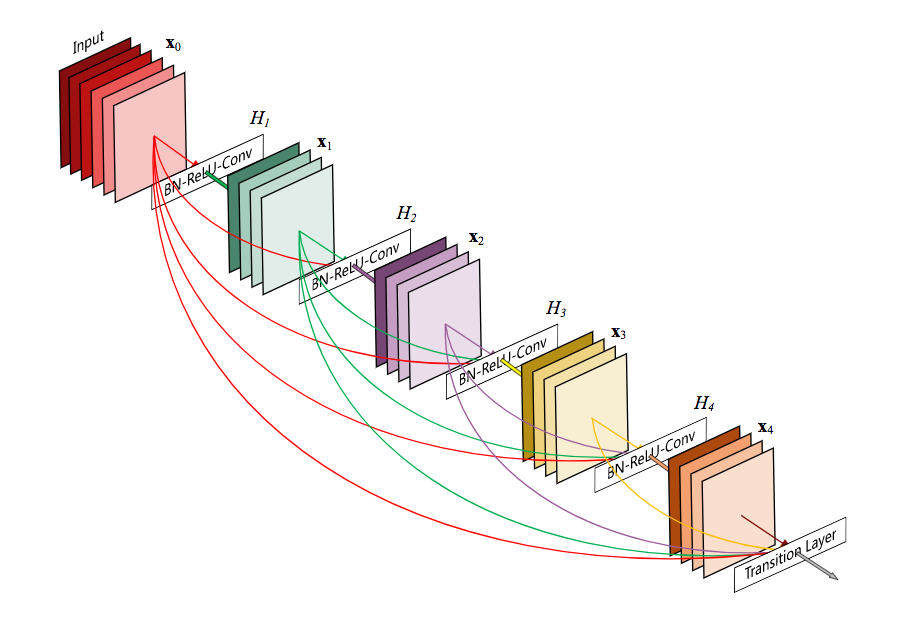

In [12]:
from IPython.display import Image
local_image_path = '/content/densenet.png'
Image(filename=local_image_path, width=400)


In [14]:
# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from google.colab import drive

In [17]:
drive.mount('/content/gdrive')
base_model = DenseNet121(weights='/content/gdrive/MyDrive/densenet.hdf5', include_top=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, None, None, 3)        0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']

In [19]:
# Let's print out the first five layers
layers_l = base_model.layers

print("First 5 layers")
layers_l[0:5]

First 5 layers


In [20]:
# The last five layers
print("Last 5 layers")
layers_l[-6:-1]

Last 5 layers


In [22]:
# Get the convolutional layers and print the first 5
conv2D_layers = [layer for layer in base_model.layers
                if str(type(layer)).find('Conv2D') > -1]
print("The first five conv2D layers")
conv2D_layers[0:5]

The first five conv2D layers


In [23]:
# The total number of convolutional layers
print(f"There are {len(conv2D_layers)} convolutional layers")

There are 120 convolutional layers


In [24]:
# Number of channels in the input
print("The input has 3 channels")
base_model.input

The input has 3 channels


<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>

In [26]:
# Number of output channels
print("The output has 1024 channels")
x = base_model.output
x

The output has 1024 channels


<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [27]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D() (x)
x_pool

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [28]:
# Let's define a set of five class labels to use as an example
labels = ['Emphysema',
          'Hernia',
          'Mass',
          'Pneumonia',
          'Edema']
n_classes = len(labels)
print(f"In this example, you want your model to identify {n_classes} classes")

In this example, you want your model to identify 5 classes


In [29]:
# Add a logistic layer the same size as the number of classes you're trying to predict
predictions = Dense(n_classes, activation="sigmoid")(x_pool)
print("Predictions have {n_classes} units, one for each class")
predictions

Predictions have {n_classes} units, one for each class


<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

In [30]:
# Create an updated model
model = Model(inputs=base_model.input, outputs=predictions)

In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy')
# (You'll customize the loss function in the assignment!)